# 순환 신경망으로 IMDB 리뷰 분류하기

In [8]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

In [9]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [10]:
print(len(train_input[0]))

218


In [11]:
print(len(train_input[1]))

189


In [12]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [13]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [14]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state = 42)

In [15]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [16]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


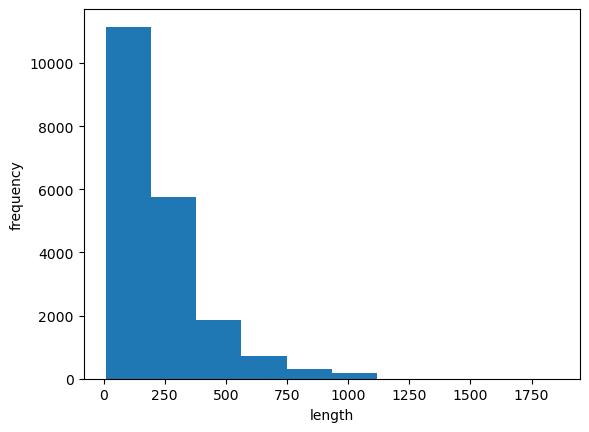

In [17]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [18]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen= 100) # maxlen보다 길면 짤라내고 짧은 경우는 0으로 패딩

In [19]:
print(train_seq.shape)

(20000, 100)


In [20]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [21]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [22]:
val_seq = pad_sequences(val_input, maxlen = 100)

## 순환 신경망 만들기

In [23]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape = (100, 500)))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [24]:
train_oh = keras.utils.to_categorical(train_seq)

In [25]:
print((train_oh.shape))

(20000, 100, 500)


In [26]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [27]:
print(np.sum(train_oh[0][0]))

1.0


In [28]:
val_oh = keras.utils.to_categorical(val_seq)

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4081 (15.94 KB)
Trainable params: 4081 (15.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 순환 신경망 훈련하기

In [30]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss = 'binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs = 100, batch_size = 64, validation_data = (val_oh, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 7s 18ms/step - loss: 0.6931 - accuracy: 0.5265 - val_loss: 0.6896 - val_accuracy: 0.5378
Epoch 2/100
  9/313 [..............................] - ETA: 4s - loss: 0.6872 - accuracy: 0.5451

c:\Users\com\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 5s 16ms/step - loss: 0.6829 - accuracy: 0.5612 - val_loss: 0.6753 - val_accuracy: 0.5788
Epoch 3/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6563 - accuracy: 0.6212 - val_loss: 0.6502 - val_accuracy: 0.6282
Epoch 4/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6309 - accuracy: 0.6590 - val_loss: 0.6218 - val_accuracy: 0.6692
Epoch 5/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6094 - accuracy: 0.6824 - val_loss: 0.6073 - val_accuracy: 0.6806
Epoch 6/100
313/313 [==============================] - 5s 17ms/step - loss: 0.5896 - accuracy: 0.7037 - val_loss: 0.5850 - val_accuracy: 0.7048
Epoch 7/100
313/313 [==============================] - 5s 17ms/step - loss: 0.5716 - accuracy: 0.7203 - val_loss: 0.5669 - val_accuracy: 0.7300
Epoch 8/100
313/313 [==============================] - 5s 17ms/step - loss: 0.5569 - accuracy: 0.7311 - val_loss: 0.5547 - val_accuracy: 0.7322
Epoc

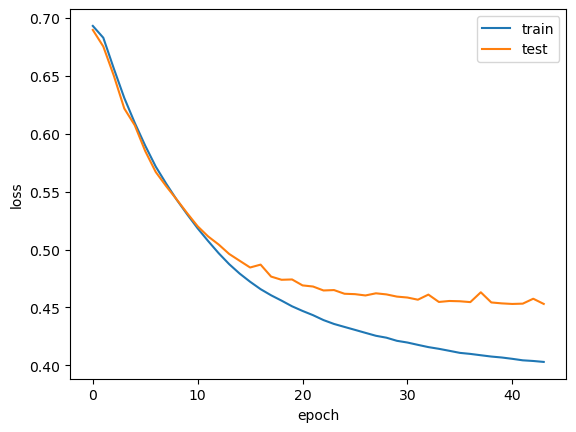

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.show()

In [32]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


### one-hot 인코딩 -> 임베딩

In [37]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [38]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8209 (32.07 KB)
Trainable params: 8209 (32.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss = 'binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 6s 16ms/step - loss: 0.6960 - accuracy: 0.5053 - val_loss: 0.6922 - val_accuracy: 0.5170
Epoch 2/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6893 - accuracy: 0.5332 - val_loss: 0.6877 - val_accuracy: 0.5372
Epoch 3/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6823 - accuracy: 0.5637 - val_loss: 0.6808 - val_accuracy: 0.5678
Epoch 4/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6737 - accuracy: 0.5943 - val_loss: 0.6722 - val_accuracy: 0.5932
Epoch 5/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6510 - accuracy: 0.6418 - val_loss: 0.6103 - val_accuracy: 0.6924
Epoch 6/100
313/313 [==============================] - 5s 16ms/step - loss: 0.5796 - accuracy: 0.7182 - val_loss: 0.5729 - val_accuracy: 0.7204
Epoch 7/100
313/313 [==============================] - 5s 16ms/step - loss: 0.5510 - accuracy: 0.7433 - val_loss: 0.5553 - val_accuracy:

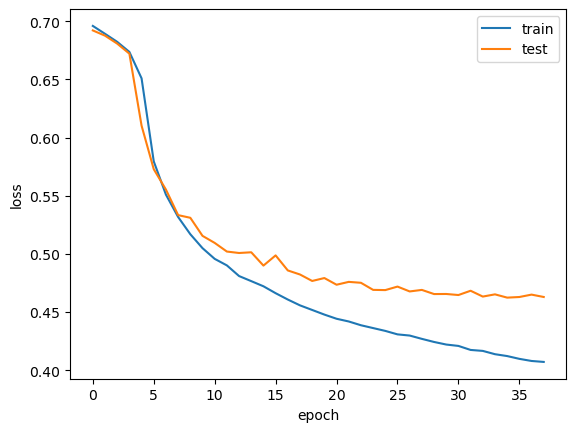

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.show()

## LSTM과 GRU셀

### LSTM 신경망 훈련하기

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state = 42)

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen = 100)
val_seq = pad_sequences(val_input, maxlen = 100)

In [3]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_db = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_db, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 28ms/step - loss: 0.6924 - accuracy: 0.5324 - val_loss: 0.6919 - val_accuracy: 0.5552
Epoch 2/100
  5/313 [..............................] - ETA: 8s - loss: 0.6926 - accuracy: 0.4969

c:\Users\com\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 9s 28ms/step - loss: 0.6912 - accuracy: 0.5691 - val_loss: 0.6905 - val_accuracy: 0.5782
Epoch 3/100
313/313 [==============================] - 9s 27ms/step - loss: 0.6893 - accuracy: 0.5907 - val_loss: 0.6880 - val_accuracy: 0.5948
Epoch 4/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6857 - accuracy: 0.6090 - val_loss: 0.6835 - val_accuracy: 0.6174
Epoch 5/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6788 - accuracy: 0.6288 - val_loss: 0.6744 - val_accuracy: 0.6360
Epoch 6/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6635 - accuracy: 0.6597 - val_loss: 0.6517 - val_accuracy: 0.6690
Epoch 7/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6205 - accuracy: 0.7031 - val_loss: 0.5940 - val_accuracy: 0.7172
Epoch 8/100
313/313 [==============================] - 8s 25ms/step - loss: 0.5737 - accuracy: 0.7311 - val_loss: 0.5668 - val_accuracy: 0.7302
Epoc

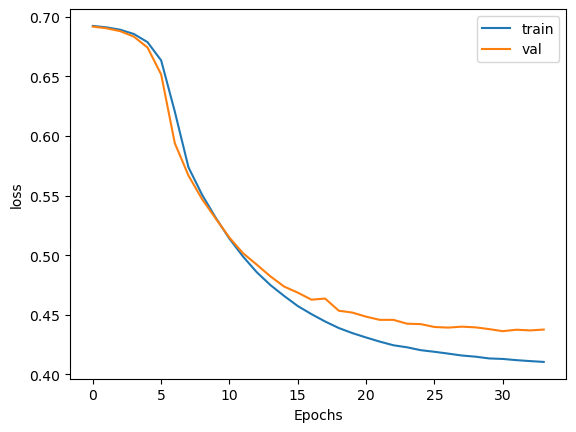

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()


### 순환층에 드랍아웃 적용

In [11]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [12]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_db = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_db, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 12s 30ms/step - loss: 0.6929 - accuracy: 0.5185 - val_loss: 0.6926 - val_accuracy: 0.5410
Epoch 2/100
  5/313 [..............................] - ETA: 8s - loss: 0.6921 - accuracy: 0.5437

c:\Users\com\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 8s 27ms/step - loss: 0.6921 - accuracy: 0.5569 - val_loss: 0.6918 - val_accuracy: 0.5586
Epoch 3/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6909 - accuracy: 0.5723 - val_loss: 0.6904 - val_accuracy: 0.5796
Epoch 4/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6890 - accuracy: 0.5943 - val_loss: 0.6879 - val_accuracy: 0.6012
Epoch 5/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6853 - accuracy: 0.6176 - val_loss: 0.6830 - val_accuracy: 0.6302
Epoch 6/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6771 - accuracy: 0.6436 - val_loss: 0.6699 - val_accuracy: 0.6642
Epoch 7/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6420 - accuracy: 0.6854 - val_loss: 0.5987 - val_accuracy: 0.7146
Epoch 8/100
313/313 [==============================] - 8s 26ms/step - loss: 0.5769 - accuracy: 0.7234 - val_loss: 0.5625 - val_accuracy: 0.7342
Epoc

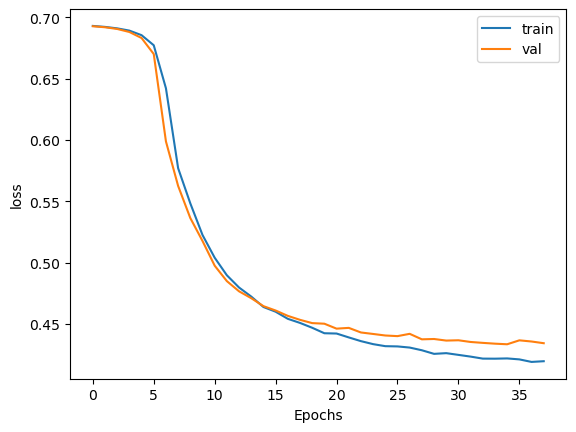

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [14]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [15]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_4 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_5 (LSTM)               (None, 8)                 544       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9353 (36.54 KB)
Trainable params: 9353 (36.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_db = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_db, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 21s 54ms/step - loss: 0.6931 - accuracy: 0.5078 - val_loss: 0.6930 - val_accuracy: 0.5006
Epoch 2/100
  3/313 [..............................] - ETA: 14s - loss: 0.6928 - accuracy: 0.5365

c:\Users\com\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 16s 50ms/step - loss: 0.6928 - accuracy: 0.5183 - val_loss: 0.6927 - val_accuracy: 0.5436
Epoch 3/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6922 - accuracy: 0.5544 - val_loss: 0.6919 - val_accuracy: 0.5716
Epoch 4/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6904 - accuracy: 0.5871 - val_loss: 0.6888 - val_accuracy: 0.5850
Epoch 5/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6805 - accuracy: 0.6245 - val_loss: 0.6670 - val_accuracy: 0.6470
Epoch 6/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6358 - accuracy: 0.6797 - val_loss: 0.6075 - val_accuracy: 0.6984
Epoch 7/100
313/313 [==============================] - 15s 49ms/step - loss: 0.5867 - accuracy: 0.7170 - val_loss: 0.5672 - val_accuracy: 0.7296
Epoch 8/100
313/313 [==============================] - 15s 49ms/step - loss: 0.5526 - accuracy: 0.7397 - val_loss: 0.5338 - val_accuracy: 0.75

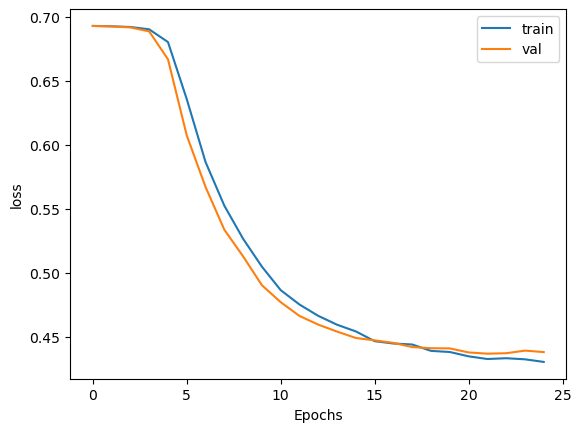

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### GRU 신경망 훈련하기

In [18]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length = 100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [19]:
model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8633 (33.72 KB)
Trainable params: 8633 (33.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_db = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_db, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 29ms/step - loss: 0.6930 - accuracy: 0.5071 - val_loss: 0.6917 - val_accuracy: 0.5376
Epoch 2/100
  4/313 [..............................] - ETA: 13s - loss: 0.6919 - accuracy: 0.5195

c:\Users\com\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 9s 29ms/step - loss: 0.6903 - accuracy: 0.5591 - val_loss: 0.6890 - val_accuracy: 0.5570
Epoch 3/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6863 - accuracy: 0.5865 - val_loss: 0.6841 - val_accuracy: 0.5954
Epoch 4/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6794 - accuracy: 0.6109 - val_loss: 0.6763 - val_accuracy: 0.6080
Epoch 5/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6675 - accuracy: 0.6371 - val_loss: 0.6613 - val_accuracy: 0.6374
Epoch 6/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6462 - accuracy: 0.6591 - val_loss: 0.6359 - val_accuracy: 0.6658
Epoch 7/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6034 - accuracy: 0.6950 - val_loss: 0.5763 - val_accuracy: 0.7152
Epoch 8/100
313/313 [==============================] - 8s 26ms/step - loss: 0.5261 - accuracy: 0.7430 - val_loss: 0.5145 - val_accuracy: 0.7512
Epoc

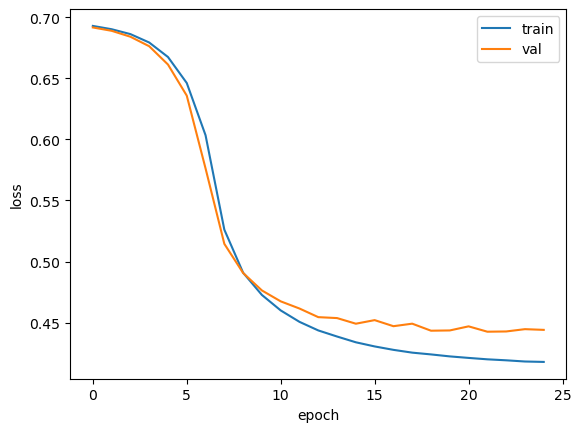

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()